In [1]:
%matplotlib inline
import random

import matplotlib.pyplot as plt
import numpy as np

from model_evaluation import single_decoding_routine

In [2]:
# SIMULATION PARAMETERS
tree_path = "tree.json"
alphabet = ['A', 'C', 'T', 'G']
alphabetSize = len(alphabet)

nbState = 4
# transition matrix of the toy gene finder
A = np.zeros((nbState, nbState))
A[0, 1] = 1
A[1, 2] = 1
A[2, 3] = 0.10
A[2, 0] = 1 - A[2, 3]
A[3, 3] = 0.8  # 0.9999  # unrealistic ...
A[3, 0] = 1 - A[3, 3]

# state initial probability
b = np.array([0.25, 0.25, 0.25, 0.25])

animalNames = ["dog", "cat", "pig", "cow", "rat", "mouse", "baboon",
               "human"]
n_species = len(animalNames)
"""[...], such as the higher average rate of substitution and the greater
transition/transversion ratio, in noncoding and third-codon-position sites
than in firstand second- codon-position sites[...]"""

pi_easy = np.load("pi_easy.npy")
pi_difficult = np.load("pi_difficult.npy")

# translation/transversion rate
kappa = np.array([2.3, 2.7, 4.3, 5.4])

# scaling factors for the different states
scaling_factors = np.load("scaling_factors.npy")

In [3]:
# MONTE-CARLO PARAMETERS
n_nucleotids = 1000
n_simulations = 600

In [8]:
# Precision, sensitivity and specificity
precision_difficult, sensitivity_difficult, specificity_difficult = np.zeros(n_simulations), np.zeros(n_simulations), np.zeros(n_simulations)
for i in range(n_simulations):
    precision_difficult[i], sensitivity_difficult[i], specificity_difficult[i] = single_decoding_routine(tree_path, n_nucleotids, alphabet, 
                                                                           A, b, n_species, pi_difficult, kappa, scaling_factors)
summary_difficult = {
    "precision difficult": np.mean(precision_difficult),
    " sensitivity difficult": np.mean(sensitivity_difficult),
    "specificity difficult": np.mean(specificity_difficult)
          }

precision_easy, sensitivity_easy, specificity_easy = np.zeros(n_simulations), np.zeros(n_simulations), np.zeros(n_simulations)
for i in range(n_simulations):
    precision_easy[i], sensitivity_easy[i], specificity_easy[i] = single_decoding_routine(tree_path, n_nucleotids, alphabet, 
                                                                           A, b, n_species, pi_easy, kappa, scaling_factors)
summary_easy = {
    "precision easy": np.mean(precision_easy),
    " sensitivity easy": np.mean(sensitivity_easy),
    "specificity easy": np.mean(specificity_easy)
          }


/home/zaccharie/workspace/PGM/Project/phylo-hmm/viterbi_sumproduct.py:49: RuntimeWarning: divide by zero encountered in log
  prob = np.log(A[:, s]) + alpha_log[:, t - 1]


In [9]:
print(summary_easy)
print(summary_difficult)

{'precision easy': 0.97064166666666662, 'specificity easy': 0.97295988946769052, ' sensitivity easy': 0.87580696083193954}
{'precision difficult': 0.93674999999999997, 'specificity difficult': 0.94768011016116438, ' sensitivity difficult': 0.89965749609692869}


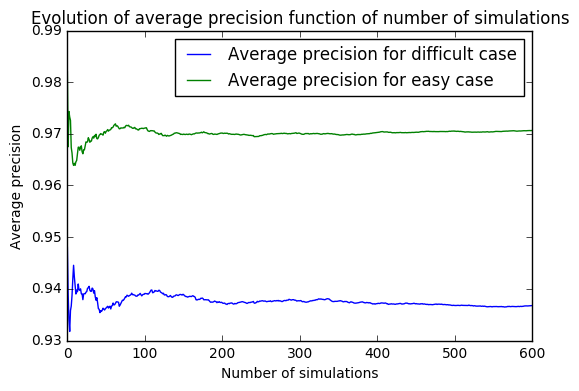

In [11]:
plt.plot(np.cumsum(precision_difficult) / (np.arange(len(precision_difficult))+1),
         label="Average precision for difficult case")
plt.plot(np.cumsum(precision_easy) / (np.arange(len(precision_easy))+1),
         label="Average precision for easy case")
plt.xlabel("Number of simulations")
plt.ylabel("Average precision")
plt.title("Evolution of average precision function of number of simulations")
plt.legend(loc=1)
plt.show()